### Author: Aditi Kathalay

# The Sparks Internship Foundation Data Science and Business Analytics

## Task 2 Unsupervised ML Prediction Model
In this task it is required to predict the optimum number of cluster for the iris data set .iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica

## Model Used: k-means Clustering
#### Author: Aditi Kathalay

### Steps:

- Step 1 - Importing the libraries
- Step 2 - Importing the dataset
- Step 3 - EDA
- Step 4 - Elbow Method
- Step 5 - Applying K means clustering algorithm
- Step 6 - Final clusters



## Step 1 : Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
%matplotlib inline

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

## Step 2: Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\aditi_zg48xl\Downloads\Iris.csv')

## Step 3: EDA (Exploratory Data Analysis)

In [3]:
df.head()                  #First 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.head()                  #Last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape                  #Total rows and columns

(150, 6)

### Checking for null values

In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


### "False" indicates no null values exist

### Using nunique() method to return unique values in the DataFrame

In [7]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
df.describe                 # returns description of data

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

<Axes: >

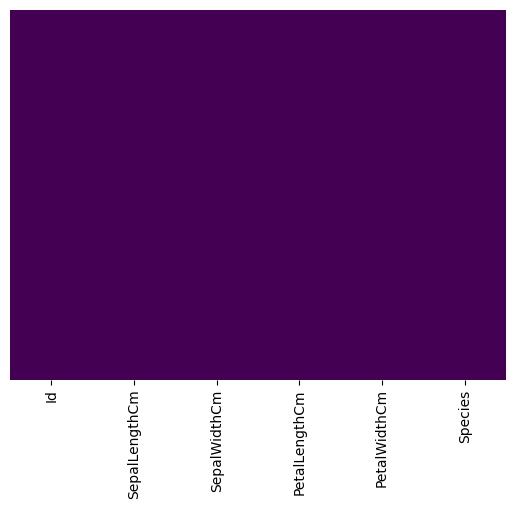

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Species', ylabel='count'>

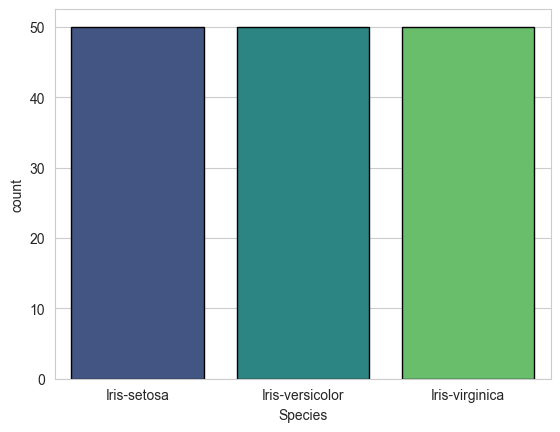

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='PetalWidthCm', ylabel='count'>

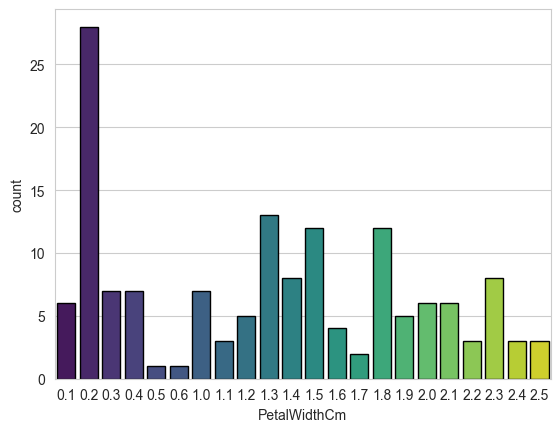

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='PetalWidthCm',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='SepalWidthCm', ylabel='count'>

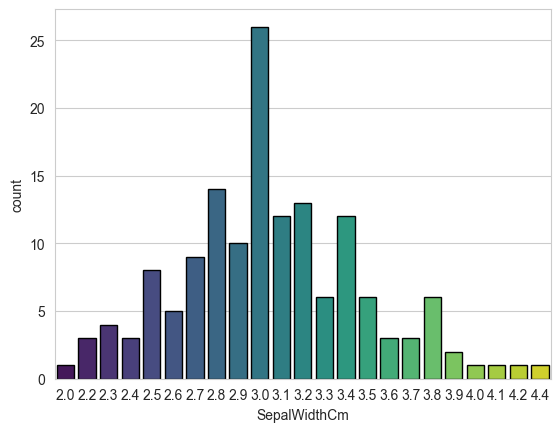

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='SepalWidthCm',data=df,palette='viridis',saturation=0.8,edgecolor="black")

### Dropping last column as labels aren't there in unsupervised machine learning

In [13]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
correlation = iris_df.corr()

<Axes: >

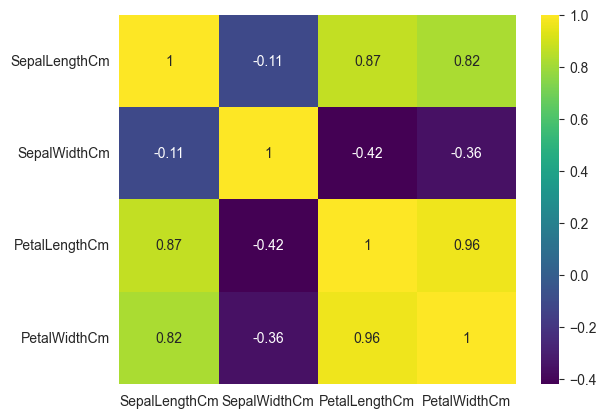

In [15]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='viridis')

## Step 4: Finding Clusters

In [16]:
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

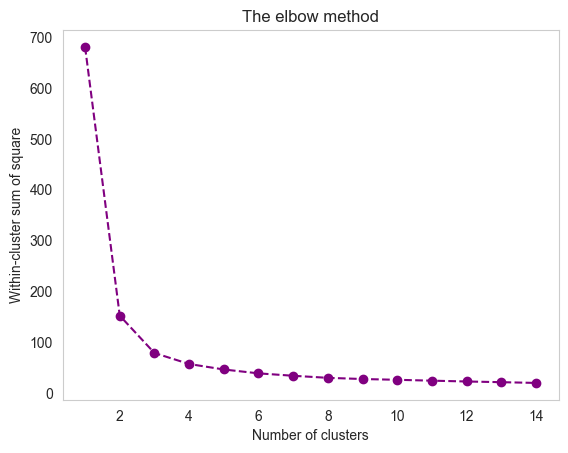

In [17]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='purple')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


## Step 5 : Model Application

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

## Step 6: Clusters

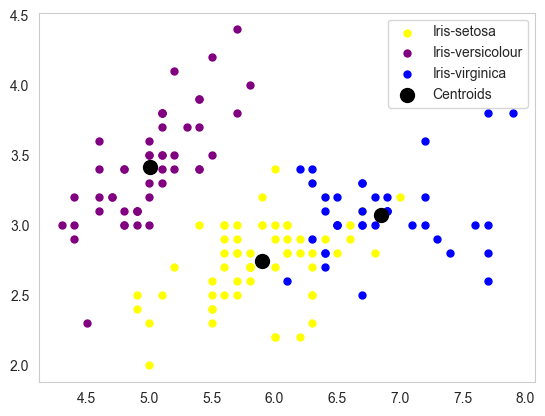

In [19]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'blue', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

## Thank You!